Andrew Oliva

AME60631 - Experimental Methods in Fluids

HW3

Derive an Expression for the transfer function of this ciruit and plot (or sketch) the response plot

!["Actual Circuit"](files/circuit_actual.png)


First, I noted that we are working with complex impedances. So the circuit above is really...

!["Complex Circuit"](circuit_impedance.png)

Where $Z_1$ and $Z_2$ are the equivalent impedances of the two combined RC circuits.

\begin{equation}
Z_1 = \frac{Z_{R1} Z_{C1}}{Z_{R1} + Z_{C1}}
\end{equation}

\begin{equation}
Z_2 = \frac{Z_{R2} Z_{C2}}{Z_{R2} + Z_{C2}}
\end{equation}

Now, we know from $V=IR$ in the complex domain is $V=IZ$. Where $V$ is the electric potential (voltage), $I$ is electric current (amperes), and $Z$ is the complex impedance (ohms).

\begin{equation}
V_o = I_2 Z_2
\end{equation}

\begin{equation}
I_2 = -\frac{V_i}{Z_1}
\end{equation}

Then substituting $I_2$ into the equation for $V_o$,

\begin{equation}
V_o = -\frac{V_i}{Z_1} Z_2 = -\frac{Z_2}{Z_1} V_i = -\frac{Z_{R1} Z_{C1}}{Z_{R1} + Z_{C1}} \frac{Z_{R2} + Z_{C2}}{Z_{R2} Z_{C2}} V_i 
\end{equation}

Knowing that $Z_R = R$ and $Z_C = 1/(i \omega C)$ gives us,

\begin{equation}
\frac{V_o}{V_i} = \left(-\frac{R_2}{R_1}\right) \left(\frac{i \omega R_1 C_1 + 1}{i \omega R_2 C_2 + 1}\right)
\end{equation}

Letting $\tau = RC$ gives,

\begin{equation}
\frac{V_o}{V_i} = \left(-\frac{R_2}{R_1}\right) \left(\frac{i \omega \tau_1 + 1}{ i \omega \tau_2 + 1}\right)
\end{equation}

and finally,

\begin{equation}
\left(\frac{A_o}{A_i}\right) = \left(\frac{R_2}{R_1}\right) \left(\frac{\sqrt{\omega^2 \tau_1^2 + 1}}{\sqrt{\omega^2 \tau_2^2 + 1}}\right)
\end{equation}


Values for $\frac{R_2}{R_1}$, $\tau_1$, $\tau_2$ are somewhat arbitrarily chosen for plotting below:

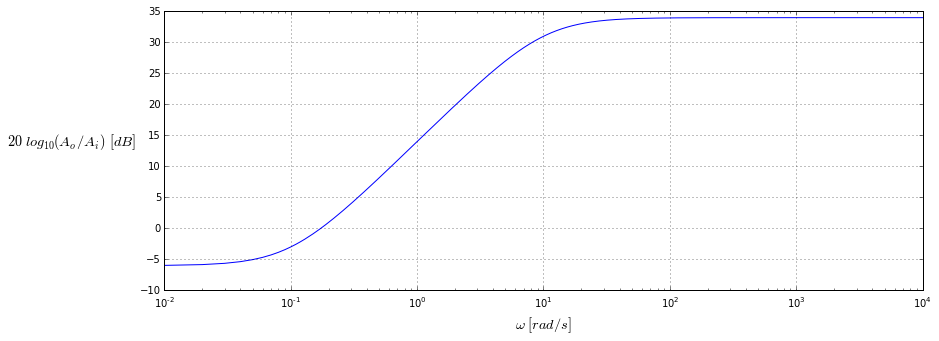

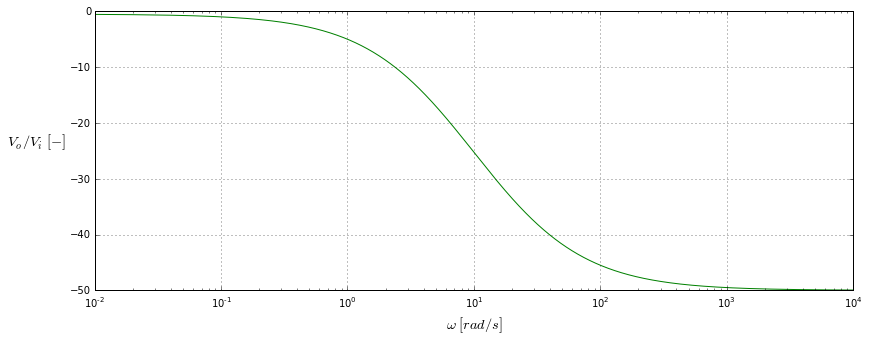

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Now chose values based on the derived equation above for plotting
R2_R1 = 0.5
tau1 = 10
tau2 = 1./10.

# omega (w) is defined below - going from 0.01 rad/s to 10,000 rad/s in steps of 0.01 rad/s
w = np.arange(0.01,10000.,0.01)

# Amplitude Ratio is defined here
AR = 20 * np.log10(R2_R1 * np.sqrt(w**2 * tau1**2 + 1)/np.sqrt(w**2 * tau2**2 + 1))

# V_o/V_i (the transfer function)
TF = -R2_R1 * (w*tau1 + 1)/(w*tau2 + 1)

# now plotting
plt.figure(0,figsize=(5*np.e,5))
plt.xscale('log')
plt.grid('on')
plt.ylabel(r'$20\ log_{10}(A_o/A_i)\ [dB]$',rotation='horizontal',horizontalalignment='right',fontsize='x-large')
plt.xlabel(r'$\omega\ [rad/s]$',fontsize='x-large')
plt.plot(w,AR,'b-')

plt.figure(1,figsize=(5*np.e,5))
plt.xscale('log')
plt.grid('on')
plt.ylabel(r'$V_o/V_i\ [-]$',rotation='horizontal',horizontalalignment='right',fontsize='x-large')
plt.xlabel(r'$\omega\ [rad/s]$',fontsize='x-large')
plt.plot(w,TF,'g-')
